### 0. 데이터 준비

In [ ]:
#라이브러리 불러오기

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')

In [ ]:
#content에 df_funnel2.csv 파일 업로드 후, 함수 입력
#주의사항: 창을 닫으면 업로드했던 df_funnel2.csv도 함께 사라지므로,
#전처리를 할 경우에는 구글 드라이브를 연동하여 작업후 저장하는 것이 좋음

df = pd.read_csv('/content/df_funnel2.csv', index_col=0) #index_col=0 인덱스 열 제거
df.head()

### 칼럼 정보
- actiontype: 문서 이용시 행동(CLOSE, OPEN, RESET, SAVE)
- ismydoc: 내문서 해당 여부(중요x)
- ext: 문서 확장자(DOC,	HWP,	PDF,	PPT,	TXT,	XLS)
- sessionid: 유저
- documentposition: 문서 이용시 위치 정보(LOCALSTORAGE,	MYPOLARISDRIVE,	NEWDOCUMENT,	OTHERAPP,	OTHERCLOUD,	SHAREDDOCUMENT)
- datetime: Timestamp
- screen: 앱내 화면 이름(Main,	Pub_Dir,	Per_Dir,	InProduct_Web,	InProduct_Mob,	Purchase_page,	Purchase_done)

## 1. EDA (탐색적 데이터 분석)

- 일별 주요 통계
- 변수별 특성
- 구간별 전환율 (Funnel Analysis)

### 1.1 일별 Trend (1) - 보고서 II.1.

- 탐색 내용
    - 일별 로그 카운트
    - 일별 세션 카운트

- 시각화 라이브러리 matplotlib 사용: https://wikidocs.net/book/5011 참고

In [ ]:
# 일별 로그 카운트

df.groupby("datetime").size().plot(c='r'); # groupby: 그룹별로 데이터를 집계하는 분석

#시각화라이브러리인 matplotlib 사용
plt.title("Daily Log Count") #표 제목
plt.grid(color='lightgrey', alpha=0.5, linestyle='--') #표 격자 표시
plt.tight_layout() #키워드가 겹치지 않도록 여백 만들어주기

In [ ]:
# 일별 세션 카운트

df.groupby("datetime")['sessionid'].nunique().plot(c='b'); 

plt.title("Daily Session")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### Note. (보고서 작성을 위한 정리)

### 1.1 일별 Trend (2) - 보고서 II.1.

- 탐색 내용
    - 일별, 확장자별 로그수
    - 일별, 위치별 로그수
    - 일별, 액션별 로그수
    - 일별, 화면 스크린별 유니크 유저수
- 시각화 라이브러리 matplotlib 사용

In [ ]:
# 일별, 확장자별 로그수

df.groupby(["datetime", "ext"]).size().unstack().dropna(axis=1).plot(figsize=(12,7));

plt.title("Daily Extention Trend")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [ ]:
# 일별, 문서 위치별 로그수

df.groupby(["datetime", "documentposition"]).size().unstack().dropna(axis=1).plot(figsize=(12,7));

plt.title("Daily documentposition")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [ ]:
# 일별, 문서 내 액션 별 로그수

df.groupby(["datetime", "actiontype"]).size().unstack().dropna(axis=1).plot(figsize=(12,7));

plt.title("Daily actiontype")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [ ]:
# 일별, 스크린 별 로그수

df.groupby(["datetime", "screen"]).size().unstack().fillna(0).astype(int).plot(figsize=(12,7));

plt.title("Daily screens")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [ ]:
# 표 그리기(행:스크린, 열:일별, 내용:사용자 수)
screens = df.groupby(["datetime", "screen"])['sessionid'].nunique().unstack().fillna(0).astype(int)

# cols order change
screens = screens[screens.mean().sort_values(ascending=False).index] #사용자 수 평균, 내림차순 정렬

screens[:10] #10행까지 출력

In [ ]:
#위의 표를 히트맵으로 시각화

plt.subplots(figsize=(17,8))

sns.heatmap(screens, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Blues');

plt.title("screen count daily")
plt.tight_layout()

### Note. (보고서 작성을 위한 정리)

### 1.2 Pivoting 을 통한 변수별 특성 탐색 - 보고서 II.2.
- unstack, stack, pivot_table 과 같은 pandas 함수를 이용해, 다양한 각도에서 데이터 탐색(pivot)

In [ ]:
#행:확장자, 열: 액션, 내용: 사용자 수

plt.subplots(figsize=(10,6))

ext_action = df.groupby(["ext", "actiontype"])['sessionid'].nunique().unstack().fillna(0).astype(int)
sns.heatmap(ext_action, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Greens');

plt.title("ext_action crosstab")
plt.tight_layout()

In [ ]:
# 위의 히트맵에서 사용자 수를 퍼센트로 표시

df.groupby(["ext", "actiontype"])['sessionid'].nunique().unstack().fillna(0).apply(lambda x: x/x.sum()*100).round(2)

In [ ]:
# 행: 확장자, 열: 문서 이용위치, 내용: 사용자 수

plt.subplots(figsize=(10,6))

ext_pos = df.groupby(["ext", "documentposition"])['sessionid'].nunique().unstack().fillna(0).astype(int)

sns.heatmap(ext_pos, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Reds');

plt.title("ext_position crosstab")
plt.tight_layout()

### Note. (보고서 작성을 위한 정리)

### 1.3 변수별 분포 및 상관관계 - 보고서 II.2.

In [ ]:
df.head(10)

In [ ]:
#이용자가 액션 중 open을 한 확장자

ext_by_session = df.query("actiontype == 'OPEN'").groupby(["sessionid", "ext"]).size().unstack().dropna(how='all')

ext_by_session.head()

In [ ]:
#이용자가 액션 중 open을 한 문서 위치

pos_by_session = df.query("actiontype == 'OPEN'").groupby(['sessionid', 'documentposition']).size().unstack().dropna(how='all')

pos_by_session.head()

In [ ]:
# 사용자를 기준으로 위의 두 표를 합침

exp_pos = pd.concat([ext_by_session, pos_by_session], axis=1).fillna(0)

exp_pos.head()

In [ ]:
exp_pos.describe().round(2) #요약 정보, 소수점 세자리수에서

In [ ]:
#변수 간 상관관계, 0에 가까울수록 선형 관계가 약해지고, 1에 가까울수록 강해짐.

plt.subplots(figsize=(17,8))

sns.heatmap(exp_pos.corr(), annot=True, annot_kws={"size": 12}, cmap='Blues');

plt.title("Correlations")
plt.tight_layout()

### Note. (보고서 작성을 위한 정리)

### 1.4 구간별 전환율 (Funnel) Daily Trend - 보고서 II.3.

In [ ]:
screens.head(10) # 행:스크린, 열:일별, 내용:사용자 수

In [ ]:
# 각 칼럼별 평균값
conver_cnt = screens.mean().apply(lambda x: int(x)).sort_values(ascending=False)

conver_cnt

In [ ]:
# 평균값을 전환율로 변환(전환율: 전환수/전체 방문자수)
for i in range(len(conver_cnt)-1):
    print((conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100).round(2))

In [ ]:
# 전환율 구하는 다른 함수

conver_rt = [(conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100).round(2) for i in range(len(conver_cnt)) if i < 6]

conver_rt

In [ ]:
#전환율 시각화

pd.Series(conver_rt).plot(kind='bar', color = 'darkblue', rot=0)

plt.title("Conver Rate (%)")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [ ]:
# 라벨 생성
fun_label = [conver_cnt.index[k] + " > " + conver_cnt.index[k + 1] for k, v in enumerate(conver_cnt.index) if k < 6]

fun_label

In [ ]:
# 생성한 라벨로 변경하기
pd.Series(conver_rt, index=fun_label).plot(kind='bar', color = 'darkblue', rot=20, figsize=(8,5), fontsize=10)

plt.title("Conver Rate (%)")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [ ]:
# 시각화

conv_rt_tb = pd.Series(conver_rt, index=fun_label).to_frame()
conv_rt_tb.index.name = 'Funnel'
conv_rt_tb.columns = ['convert_rt']
conv_rt_tb['churn_rt'] = 100 - conv_rt_tb['convert_rt']

sns.heatmap(conv_rt_tb, annot=True, annot_kws={"size": 13}, cmap='Greens');

plt.tight_layout()

- 또다른 시각화 예시

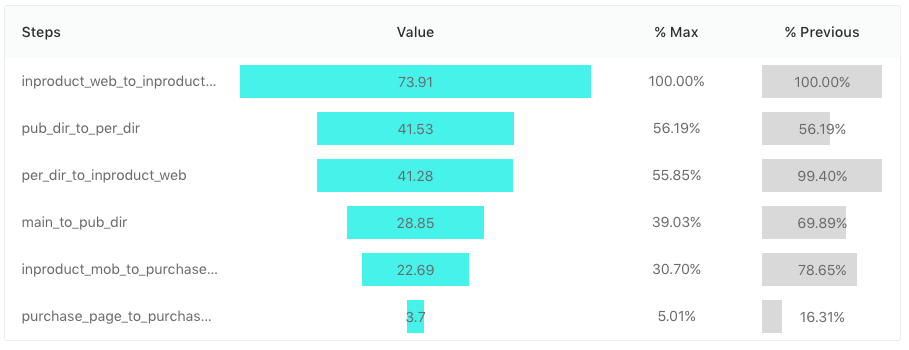

### Note. (보고서 작성을 위한 정리)

## 2. 클러스터링 For Targeting

- 클러스터링
- 클러스터별 전환율 차이 파악

### 2.1 클러스터링

In [ ]:
df.head()

In [ ]:
# 확장자만 기준으로 group by sessionid 하여 클러스터링을 위한 전처리 진행
# Note. 만약에 다른 변수가 같이 있다면 scaling 필수

#확장자 기준으로, 액션 중 open을 한 사용자
df_ext = df.query("actiontype == 'OPEN'").groupby(["sessionid", "ext"]).size().unstack().fillna(0)

df_ext.head(10)

In [ ]:
df_ext_elbow = df_ext.copy()

In [ ]:
from sklearn.cluster import KMeans

#군집 갯수를 설정하기 전, 군집 갯수 별 응집도 탐색. 값이 작을수록 응집도가 높게 군집화가 잘 되었다는 뜻

sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_ext_elbow)
    df_ext_elbow["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

#### Note.
- 군집 4개-9개로 설정하여 변화를 보는 것이 좋으나, 여기서는 임의로 4개로 설정

In [ ]:
#군집 4개로 설정

km = KMeans(n_clusters=4).fit(df_ext)

In [ ]:
#군집 별 라벨 생성

labels = km.labels_

labels

In [ ]:
#생성한 라벨 추가

df_ext['group'] = labels

In [ ]:
df_ext.head()

In [ ]:
#군집별 사용자 수
df_ext.group.value_counts()

In [ ]:
#군집별 평균 open

df_ext_mean = df_ext.groupby("group").mean().round(2)

df_ext_mean

In [ ]:
#군집별 평균 open 히트맵으로 시각화

plt.subplots(figsize=(8,6))

sns.heatmap(df_ext_mean.T, annot=True, cmap='Reds')

plt.tight_layout()

####  Note. 

- Labeling 주의 (실행시마다 바뀜)

In [ ]:
# 실행할 때마다 바뀌므로, 그에 맞게 라벨링 수정하기
group_name = {0: 'gr_xls',
              1: 'gr_doc',
              2: 'gr_pdf',
              3: 'gr_hwp'}

In [ ]:
#숫자로 되어있던 군집 이름을 위의 라벨링으로 변경

df_ext['group'] = df_ext['group'].replace(group_name)

In [ ]:
df_ext.head()

In [ ]:
#군집 시각화

groups = df_ext.groupby("group")

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group['DOC'], group['HWP'], marker='o', linestyle='', ms=8, label=name)
    ax.legend()

plt.xlabel("doc")
plt.ylabel("hwp")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.show()

In [ ]:
#군집 시각화

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group['PDF'], group['XLS'], marker='o', linestyle='', ms=8, label=name)
    ax.legend()

plt.xlabel("pdf")
plt.ylabel("xls")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.show()

### 2.2 클러스터별 전환율 - 보고서 II.5. & II.6.

In [ ]:
#액션 중 open인 행들만 가져오기

df_open = df.query("actiontype == 'OPEN'")

df_open.head(10)

In [ ]:
df_ext.group.head()

In [ ]:
#df_open 표의 왼쪽에 군집 정보인 group 칼럼 추가

df_cluster = df_open.merge(df_ext[['group']].reset_index(), on='sessionid', how='left')

df_cluster.head(10)

In [ ]:
#전환율을 구하기 위한 함수 정의

def conv_rt_by_grp(gr):
    df_gr_screen = df_cluster[df_cluster['group'] == gr]\
                     .groupby(["datetime", "screen"])['sessionid']\
                     .nunique().unstack().fillna(0).astype(int)
            
    conver_cnt = df_gr_screen.mean().apply(lambda x: int(x)).sort_values(ascending=False)
    conver_rt = [conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100 for i in range(len(conver_cnt)) if i < 5]
    fun_label = [conver_cnt.index[k] + " > " + conver_cnt.index[k + 1] for k, v in enumerate(conver_cnt.index) if k < 5]
    conver_rt = pd.Series(conver_rt, index=fun_label).fillna(0)
    
    return conver_rt

In [ ]:
#gr_pdf의 각 스크린 별 전환율

conv_rt_pdf = conv_rt_by_grp('gr_pdf')

conv_rt_pdf

In [ ]:
#gr_doc의 각 스크린 별 전환율

conv_rt_doc = conv_rt_by_grp('gr_doc')
conv_rt_doc

In [ ]:
#gr_xls의 각 스크린 별 전환율

conv_rt_xls = conv_rt_by_grp('gr_xls')
conv_rt_xls

In [ ]:
#gr_hwp의 각 스크린 별 전환율

conv_rt_hwp = conv_rt_by_grp('gr_hwp')
conv_rt_hwp

In [ ]:
#군집별 전환율 시각화

fig, ax = plt.subplots(4, 1, figsize=(8,20), sharey=True)

conv_rt_pdf.plot(kind='bar', ax=ax[0], color = 'brown', rot=30)
ax[0].set_title('PDF Group')
ax[0].set_ylabel('PDF Group')
ax[0].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_doc.plot(kind='bar', ax=ax[1], color = 'green', rot=30)
ax[1].set_ylabel('DOC Group')
ax[1].set_title('DOC Group')
ax[1].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_xls.plot(kind='bar', ax=ax[2], color = 'purple', rot=30)
ax[2].set_ylabel('XLS Group')
ax[2].set_title('XLS Group')
ax[2].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_hwp.plot(kind='bar', ax=ax[3], color = 'darkblue', rot=30)
ax[3].set_ylabel('HWP Group')
ax[3].set_title('HWP Group')
ax[3].grid(color='lightgrey', alpha=0.5, linestyle='--')

plt.tight_layout()

In [ ]:
# 그룹별 평균 전환율

gr_pdf_avg = conv_rt_pdf.replace(0, np.nan).mean()
gr_doc_avg = conv_rt_doc.replace(0, np.nan).mean()
gr_xls_avg = conv_rt_xls.replace(0, np.nan).mean()
gr_hwp_avg = conv_rt_hwp.replace(0, np.nan).mean()

print("pdf", gr_pdf_avg)
print("doc", gr_doc_avg)
print("xls", gr_xls_avg)
print("hwp", gr_hwp_avg)

In [ ]:
print(conv_rt_pdf)

In [ ]:
# 각 스크린 전환별 가중치 임의 설정
weights = [1, 1.3, 1.5, 2, 2.5]

# 가중 평균 구하기
def weight_avg(gr):
    w_avg = (gr.values * weights).sum() / len(gr)
    return w_avg

In [ ]:
# 각 군집별 가중 평균 전환율

gr_pdf_w = weight_avg(conv_rt_pdf)
gr_doc_w = weight_avg(conv_rt_doc)
gr_xls_w = weight_avg(conv_rt_xls)
gr_hwp_w = weight_avg(conv_rt_hwp)

print("pdf:", gr_pdf_w)
print("doc:", gr_doc_w)
print("xls:", gr_xls_w)
print("hwp:", gr_hwp_w)

In [ ]:
#각 군집별 평균 전환율과 가중 평균 전환율 비교

avg_df = pd.DataFrame(list(zip([gr_pdf_avg, gr_doc_avg, gr_xls_avg, gr_hwp_avg],\
                                   [gr_pdf_w, gr_doc_w, gr_xls_w, gr_hwp_w])), \
                                   columns = ['mean', 'wg_mean'],\
                                   index = ['gr_pdf', 'gr_doc', 'gr_xls', 'gr_hwp'])

avg_df

In [ ]:
#각 군집별 평균 전환율과 가중 평균 전환율 비교를 시각화

avg_df.plot(kind='bar', fontsize=11, rot=0)

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### Note. (보고서 작성을 위한 정리)